In [123]:
from typing import Tuple, List
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2, norm

In [92]:
def print_plot(data: List[Tuple[float, float]], name: str, parameters: List[float]):
    for index, datum in enumerate(data):
        X = [elem[0] for elem in datum]
        Y = [elem[1] for elem in datum]
        plt.plot(X, Y, label=name.format(parameters[index]))
    plt.xlabel('sample size')
    plt.ylabel('interval length')
    plt.legend()
    plt.show()

In [127]:
def get_interval_a(X: np.array, alpha: int) -> Tuple[float, float]:
    left_p, right_p = chi2.ppf([(1 + alpha) / 2, (1 - alpha) / 2], df = len(X))
    return (np.sum(X ** 2) / left_p, np.sum(X ** 2) / right_p)

def get_interval_b(X: np.array, alpha: int) -> Tuple[float, float]:
    left_p, right_p = norm.ppf([(3 + alpha) / 4, (3 - alpha) / 4]) ** 2
    return (np.sum(X ** 2) / left_p, np.sum(X ** 2) / right_p)

def get_interval_length(n: int, alpha: float, sigma: float, get_interval) -> float:
    X:np.array = np.random.normal(0, sigma, n)
    left, right = get_interval(X, alpha)
    assert(right - left > 0)
    return right - left

def conduct_experiment(alpha:float, sigma:float, interval_type):
    result = []
    for n in range(100, 100000, 200):
        result.append((n, get_interval_length(n, alpha, sigma, interval_type)))
    return result

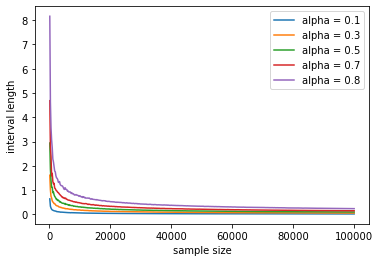

In [125]:
results = [conduct_experiment(alpha=0.1, sigma=4, interval_type=get_interval_a),
          conduct_experiment(alpha=0.3, sigma=4, interval_type=get_interval_a),
          conduct_experiment(alpha=0.5, sigma=4, interval_type=get_interval_a),
          conduct_experiment(alpha=0.7, sigma=4, interval_type=get_interval_a),
          conduct_experiment(alpha=0.9, sigma=4, interval_type=get_interval_a)]
print_plot(results, 'alpha = {}', [0.1, 0.3, 0.5, 0.7, 0.8])
# Пункт а
# Хороший доверительный интервал, позитивный. При увеличении выборки длина интервала уменьшается

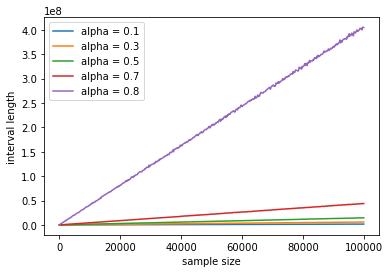

In [129]:
results = [conduct_experiment(alpha=0.1, sigma=4, interval_type=get_interval_b),
          conduct_experiment(alpha=0.3, sigma=4, interval_type=get_interval_b),
          conduct_experiment(alpha=0.5, sigma=4, interval_type=get_interval_b),
          conduct_experiment(alpha=0.7, sigma=4, interval_type=get_interval_b),
          conduct_experiment(alpha=0.9, sigma=4, interval_type=get_interval_b)]
print_plot(results, 'alpha = {}', [0.1, 0.3, 0.5, 0.7, 0.8])
# Пункт б
# Такой доверительный интервал никуда не годится - при увелечении выборки интервал становится больше